##PCA Transofmation

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

Data

In [5]:
years=["2016","2018","2019","2020"]
names=[]
years_data=[]
for i in years:
    names.append('ProjectVA/Ranking-'+i+'-Coords-clean.csv')
for name in names:   
    years_data.append(pd.read_csv(name))

In [116]:
i=0
for year_data in years_data:
    year_data["Current Rank"]=year_data["Current Rank"].fillna(1000)
    year_data["Last Rank"]=year_data["Last Rank"].fillna(1000)
    data=year_data.replace(to_replace=r'[0-9]{3}-', value='', regex=True)
    data=data.replace(to_replace=r'=', value=' ', regex=True)
    data=data.replace(to_replace=r'-', value='0', regex=True)
    data=data.replace(to_replace=r'[0-9]{1,2}.[0-9] 0', value=' ', regex=True)
    data.fillna(0.1)
    data['Overall Score'] = data['Overall Score'].astype(float)
    data['color'] = np.where(data['Overall Score']> 50.0, "red", "blue")
    year_data=data
    data.to_csv("ProjectVA/pca_csv/pca_year"+years[i]+".csv")
    i=i+1


In [129]:
data1=data[['Current Rank', 'Last Rank','Age','Academic score', 
       'Employer score','Faculty Student score', 'CitationsPerFaculty score', 'InternationalFaculty score', 'InternationalStudent score', 'Overall Score']]
data1.to_csv("prova.csv",index=False)
scaler = StandardScaler()
scaler.fit(data1)

ValueError: could not convert string to float: 'red'

In [128]:
scaled_data = scaler.transform(data1)
where_are_NaNs = np.isnan(scaled_data)
scaled_data[where_are_NaNs] = 0
scaled_data

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [121]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [122]:
x_pca = pca.transform(scaled_data)

In [123]:
scaled_data.shape

(1021, 10)

In [124]:
x_pca.shape

(1021, 2)

Text(0, 0.5, 'Second Principal Component')

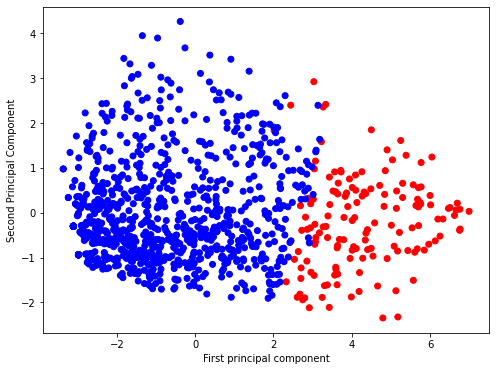

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data["color"],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')